In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import statistics
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [2]:
feature_table = pd.read_csv('/Users/arnoldtao/Documents/HoffmanLab/ClassWork/2019S_BME590_DataScience/dsah_final/feature_with_label.csv')

In [59]:
feature_table

,Chloride_max,Creatinine_max,Glucose_max,Hematocrit_max,Hemoglobin_max,Platelets_max,Potassium_max,Red blood cell count_max,Sodium_max,White blood cell count_max,...,ethnicity_MULTI RACE ETHNICITY,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,diag_count,ADDITIVE_drug,BASE_drug,MAIN_drug,label
0,108.000000,0.8,160.000000,35.400000,12.400000,210.000000,2.9,3.800000,143.000000,10.600000,...,0,0,0,0,0,14,0.0,27.0,52.0,0
1,120.000000,0.7,207.000000,30.300000,10.600000,211.000000,3.3,3.280000,148.000000,12.700000,...,0,0,0,0,0,14,0.0,27.0,52.0,0
2,118.000000,0.6,137.000000,25.000000,8.900000,165.000000,4.0,2.700000,144.000000,9.800000,...,0,0,0,0,0,14,0.0,27.0,52.0,1
3,110.000000,0.9,148.000000,32.100000,11.700000,312.000000,4.7,3.610000,140.000000,16.100000,...,1,0,0,0,0,12,0.0,25.0,49.0,0
4,105.000000,0.7,122.000000,30.300000,7.200000,154.000000,4.3,2.260000,137.000000,7.700000,...,1,0,0,0,0,12,0.0,25.0,49.0,0
5,106.000000,0.5,97.000000,28.100000,9.800000,157.000000,4.0,3.180000,140.000000,7.600000,...,1,0,0,0,0,12,0.0,25.0,49.0,0
6,105.000000,0.5,117.000000,28.000000,10.100000,239.000000,4.0,3.300000,139.000000,7.000000,...,1,0,0,0,0,12,0.0,25.0,49.0,0
7,105.000000,3.7,206.000000,30.200000,9.300000,256.000000,5.0,3.880000,135.000000,12.800000,...,0,0,0,0,1,26,0.0,25.0,44.0,0
8,101.000000,4.7,131.000000,31.500000,9.400000,236.000000,5.5,3.960000,130.000000,15.400000,...,0,0,0,0,1,26,0.0,25.0,44.0,1
9,106.000000,1.1,112.000000,37.800000,13.700000,197.000000,4.0,4.230000,143.000000,7.100000,...,0,0,0,0,1,8,0.0,11.0,46.0,0


In [60]:
feature_table_df=feature_table.loc[:,feature_table.columns !="HADM_ID"]
feature_table_df=feature_table_df.loc[:,feature_table_df.columns !='bin_num']
feature_table_df=feature_table_df.loc[:,feature_table_df.columns !='label']
feature_label=feature_table_df.columns[0:,]
feature_label

Index(['Chloride_max', 'Creatinine_max', 'Glucose_max', 'Hematocrit_max',
       'Hemoglobin_max', 'Platelets_max', 'Potassium_max',
       'Red blood cell count_max', 'Sodium_max', 'White blood cell count_max',
       ...
       'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_MULTI RACE ETHNICITY',
       'ethnicity_PATIENT DECLINED TO ANSWER', 'ethnicity_UNABLE TO OBTAIN',
       'ethnicity_UNKNOWN/NOT SPECIFIED', 'ethnicity_WHITE', 'diag_count',
       'ADDITIVE_drug', 'BASE_drug', 'MAIN_drug'],
      dtype='object', length=143)

In [61]:
filter_col = [col for col in feature_table if col.startswith('abnormal')]
filter_col
abnormal_feature_table = feature_table[filter_col]
abnormal_feature_table

,abnormal_lab_Alanine Aminotransferase (ALT),abnormal_lab_Albumin,abnormal_lab_Alkaline Phosphatase,abnormal_lab_Anion Gap,abnormal_lab_Asparate Aminotransferase (AST),abnormal_lab_Bands,abnormal_lab_Bicarbonate,"abnormal_lab_Bilirubin, Direct","abnormal_lab_Bilirubin, Total",abnormal_lab_CK-MB Index,...,abnormal_lab_Troponin I,abnormal_lab_Troponin T,abnormal_lab_Urea Nitrogen,abnormal_lab_Urobilinogen,abnormal_lab_Vancomycin,abnormal_lab_WBC,abnormal_lab_White Blood Cells,abnormal_lab_pCO2,abnormal_lab_pH,abnormal_lab_pO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,4.0
2,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,2.0,5.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,2.0,2.0,5.0,2.0
8,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import Imputer
model_matrix=feature_table.loc[:,feature_table.columns !="HADM_ID"]
model_matrix=model_matrix.loc[:,model_matrix.columns != "bin_num"]
model_matrix=model_matrix.loc[:,model_matrix.columns != "label"]
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(model_matrix.values)
model_matrix = imr.transform(model_matrix.values)
outcome=feature_table['label']


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(
    model_matrix,outcome, test_size=0.2, random_state=42)
print(X_train,"xtest",X_test,"y_train",y_train,"y_test",y_test)

[[ 97.           3.4        220.         ...   0.          32.
   79.        ]
 [103.           0.9        113.         ...   0.           9.
   80.        ]
 [105.           1.1        137.         ...   0.          11.
   46.        ]
 ...
 [ 97.           2.2        174.         ...   0.          32.
   79.        ]
 [111.           1.2        100.         ...   0.          14.
   96.        ]
 [106.37477053   1.68687515 162.13882202 ...   0.           0.
    1.        ]] xtest [[119.    0.8 164.  ...   0.   19.   55. ]
 [107.    1.6 162.  ...   0.   19.  121. ]
 [112.    1.8 149.  ...   0.   15.   87. ]
 ...
 [109.    1.7 128.  ...   2.   32.   69. ]
 [119.    1.8 154.  ...   0.   21.   39. ]
 [107.    0.7 113.  ...   0.   11.   62. ]] y_train 16     0
18     0
10     0
111    0
101    0
94     0
51     0
45     0
82     0
136    0
65     0
0      0
55     0
28     0
40     0
24     1
93     0
126    0
112    0
64     0
44     0
15     0
89     0
39     0
22     0
105    0
76     0

In [65]:
#feature normalization [scale from 0-1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [66]:
#feature normalization, using standard scaler, centered at 0
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### L1 regularization to get sparse solutions

In [67]:
#L1 regularization to get sparse solutions
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',C=1)
lr.fit(X_train_std, y_train)
print("training accuracy:",lr.score(X_train_std,y_train))
print('test accuracy:',lr.score(X_test_std,y_test))

training accuracy: 0.9910714285714286
test accuracy: 0.9285714285714286


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
lr.intercept_
lr.coef_


array([[-0.09468306,  0.23478753,  0.        ,  0.        ,  0.        ,
         0.        ,  0.34028307,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.14063791,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.53830533,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.2650492 ,  0.        , -0.14450484,  0.        ,  0.04312927,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.09466384,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.09575212,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.22176777, -0.13008456, -0.01058656,  0.        ,
         0.        ,  0.        ,  0.        ,  0.0

In [69]:
np.nonzero(lr.coef_)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  0,   1,   6,  12,  18,  30,  32,  34,  41,  51,  61,  62,  63,
         68,  75,  80,  82,  83,  85,  87,  89,  90,  99, 100, 103, 104,
        106, 108, 115, 117, 118, 120, 122, 129, 139]))

### Sequential backward selection SBS

In [70]:
#sequential backward selection SBS -> reduce the dimensionality of the initial feature subspace 
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X,y):
        X_train,X_test, y_train, y_test = \
                   train_test_split(X, y, test_size=self.test_size,
                                    random_state=self.random_state)
        dim=X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test,indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [71]:
#try the SBS implementation using the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
sbs=SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)


In [72]:
sbs.subsets_[10]

(0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132)

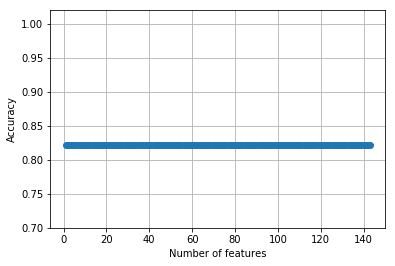

In [73]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [74]:
#train the model with knn
knn.fit(X_train_std, y_train)
print("Training accuracy:", knn.score(X_train_std,y_train),'Test accuracy:',knn.score(X_test_std,y_test))

Training accuracy: 0.875 Test accuracy: 0.9642857142857143


### assessing feature improtance with random forests


length of importances: 143 length of feature label 143 length of indices 143
 1) Red blood cell count_max       0.028291
 2) Creatinine_mean                0.027760
 3) Creatinine_min                 0.026820
 4) Sodium_mean                    0.026565
 5) Temperature_max                0.025227
 6) Creatinine_max                 0.023218
 7) Glucose_min                    0.020044
 8) Sodium_min                     0.019583
 9) Platelets_max                  0.019101
10) Red blood cell count_mean      0.018602
11) Platelets_mean                 0.017742
12) Systolic blood pressure_mean   0.017525
13) Red blood cell count_min       0.017468
14) Hematocrit_max                 0.017286
15) Chloride_min                   0.016227
16) Oxygen saturation_mean         0.016113
17) diag_count                     0.015979
18) Chloride_mean                  0.015873
19) Sodium_max                     0.015687
20) Temperature_mean               0.015175
21) Potassium_min                  0.014698

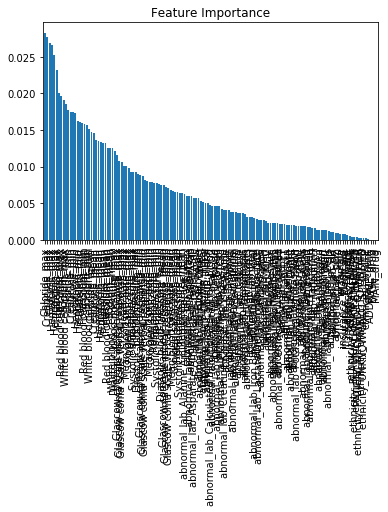

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_std,y_train)
importances = forest.feature_importances_
indices=np.argsort(importances)[::-1]
print("length of importances:",len(importances),"length of feature label",len(feature_label),"length of indices",len(indices))
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f+1,30, feature_label[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feature_label,rotation=90)
plt.xlim([-1,X_train_std.shape[1]])
# plt.tight_layout()
plt.show()

In [76]:
model_matrix.shape

(140, 143)

### Feature Extraction using PCA

In [77]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 1.87187932e+01+0.00000000e+00j  1.31166258e+01+0.00000000e+00j
  1.11231029e+01+0.00000000e+00j  7.76831805e+00+0.00000000e+00j
  6.90229551e+00+0.00000000e+00j  5.93015833e+00+0.00000000e+00j
  5.72214076e+00+0.00000000e+00j  4.85364383e+00+0.00000000e+00j
  4.60441683e+00+0.00000000e+00j  3.75131267e+00+0.00000000e+00j
  3.36894828e+00+0.00000000e+00j  3.28491399e+00+0.00000000e+00j
  3.14173521e+00+0.00000000e+00j  3.00313525e+00+0.00000000e+00j
  2.79346279e+00+0.00000000e+00j  2.61854374e+00+0.00000000e+00j
  2.42879529e+00+0.00000000e+00j  2.37881806e+00+0.00000000e+00j
  2.27276042e+00+0.00000000e+00j  2.06914523e+00+0.00000000e+00j
  1.86670542e+00+0.00000000e+00j  1.81241607e+00+0.00000000e+00j
  1.69083078e+00+0.00000000e+00j  1.59748091e+00+0.00000000e+00j
  1.50046846e+00+0.00000000e+00j  1.45942170e+00+0.00000000e+00j
  1.37291234e+00+0.00000000e+00j  1.36756883e+00+0.00000000e+00j
  1.22478935e+00+0.00000000e+00j  1.18318536e+00+0.00000000e+00j
  1.1507365

In [86]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal Component Index')
# plt.legend(loc='best')
# plt.show()

In [88]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [89]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 1.19369081e-01+0.j -1.29118810e-01+0.j]
 [-3.23303292e-02+0.j  1.10101506e-01+0.j]
 [ 5.53326951e-02+0.j  6.06396110e-02+0.j]
 [ 2.73402603e-02+0.j  2.51851246e-01+0.j]
 [ 3.74642753e-02+0.j  2.36665927e-01+0.j]
 [ 5.07772685e-02+0.j  1.45702476e-02+0.j]
 [-1.18944866e-02+0.j  9.03296755e-02+0.j]
 [ 4.06012055e-03+0.j  2.39617365e-01+0.j]
 [ 1.14320679e-01+0.j -4.00932405e-02+0.j]
 [ 1.67247339e-01+0.j  8.95712847e-02+0.j]
 [ 7.21277616e-02+0.j -1.48900856e-01+0.j]
 [-4.53443133e-02+0.j  1.00838761e-01+0.j]
 [ 3.62095973e-02+0.j  3.83979441e-02+0.j]
 [-1.34782848e-02+0.j  2.35743887e-01+0.j]
 [-7.27504041e-03+0.j  2.24428162e-01+0.j]
 [ 3.39358173e-02+0.j  6.27858881e-03+0.j]
 [-9.67523387e-02+0.j  4.95965541e-02+0.j]
 [-3.51741296e-02+0.j  2.22660301e-01+0.j]
 [ 6.43701944e-02+0.j -4.75448945e-02+0.j]
 [ 1.55139148e-01+0.j  9.57800012e-02+0.j]
 [ 1.03596033e-01+0.j -1.39374416e-01+0.j]
 [-3.95119823e-02+0.j  1.08591408e-01+0.j]
 [ 5.80494886e-02+0.j  5.54595926e-02+0.j]


In [92]:
X_train_std[0].dot(w)

array([ 6.57580825+0.j, 14.64358319+0.j])

In [94]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 6.57580825e+00+0.j,  1.46435832e+01+0.j],
       [-2.26352409e+00+0.j,  1.82843584e+00+0.j],
       [-2.02606645e+00+0.j, -3.29484293e-01+0.j],
       [-1.49652465e+00+0.j, -2.07447437e+00+0.j],
       [-4.79280019e+00+0.j,  1.01642425e-01+0.j],
       [-2.86987084e+00+0.j, -1.99661824e+00+0.j],
       [-2.77633540e+00+0.j,  2.86402226e+00+0.j],
       [-1.58316157e+00+0.j, -5.41751350e+00+0.j],
       [-2.00850381e+00+0.j, -6.47130712e-01+0.j],
       [-2.24032986e+00+0.j, -1.99189801e+00+0.j],
       [-1.52557167e+00+0.j, -3.09596646e+00+0.j],
       [ 2.34808002e+00+0.j, -8.13408405e-01+0.j],
       [ 1.15309334e+01+0.j,  2.79024942e+00+0.j],
       [ 2.60501573e+00+0.j,  4.38035753e+00+0.j],
       [-1.56409919e+00+0.j, -9.78313332e-01+0.j],
       [-1.50902531e+00+0.j, -3.35081717e+00+0.j],
       [-1.00764664e-01+0.j, -1.84544745e+00+0.j],
       [ 1.12960836e+00+0.j,  2.38217122e+00+0.j],
       [-1.29026033e+00+0.j, -1.54642158e+00+0.j],
       [-2.69468200e+00+0.j, -4

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


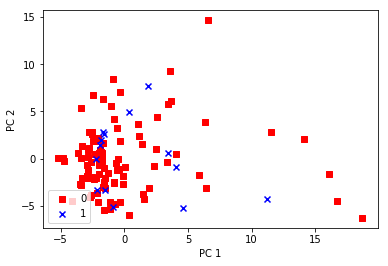

In [95]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()


PCA does not yield anything meaningful

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X_train, y_train = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
reg.score(X_train, y_train) 



0.9993566905623871

In [ ]:
#clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(X_train, y_train)